# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision
----
#### <a href="https://taldatech.github.io/">Tal Daniel</a> 

## Tutorial 01 - Python & Image Processing
---

<img src="./assets/tut_01_python_opencv_logo.png" style="height:300px">
<img src="./assets/tut_01_object_det.jpg" style="height:300px">

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Motivation and Introduction](#-Python)
* [Numpy (Numerical Python)](#-NumPy)
    * [Arrays, Matrices, and Tensors - the *ndarray*](#Arrays,-Matrices,-and-Tensors)
    * [Indexing into arrays](#Using-Boolean-and-Integer-Arrays-as-indices)
    * [Elementwise, Matrix math and Broadcasting](#Elementwise-and-Matrix-Math-(-&-Broadcasting))
    * [Other operators](#Other-Useful-Functions)
    
* [Matplotlib (Plotting and Visualization)](#-Matplotlib)
    * [Basic plots](#Line-Plots)
    * [Figures](#Bar-Plots)
    
* [OpenCV (Computer Vision)](#-OpenCV)
    * [Reading images](#Reading)
    * [Channels, Image Formats, and using images as arrays](#Channels,-Image-Formats,-and-using-images-as-arrays)
    * [Showing images](#Showing-the-image)
    * [Basic image operations - Resize, Color, and more](#Manipulating-images)
    * [Working with Video](#-Working-with-Video)
    
* [Image Processing 101](#-Image-Processing-101---Basic-Concepts)
    * [Thresholding](#Binary-thresholding)
    * [Blurring](#Gaussian-Blur)
    
* [Working with Other Libraries](#Working-with-Other-Libraries---Scikit-Image)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

## <img src="https://img.icons8.com/dusk/64/000000/python.png" style="height:50px;display:inline"> Python
---
Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. For this class all code will use Python $\geq$ 3.5.

If you don't have any background in Python, please check out <a href="http://cs231n.github.io/python-numpy-tutorial/">this basic tutorial</a>.

## <img src="https://img.icons8.com/clouds/100/000000/calculator.png" style="height:50px;display:inline"> NumPy
---
NumPy is the fundamental package for scientific computing with Python. It contains among other things:

* A powerful N-dimensional array object

* Sophisticated (broadcasting) functions

* Tools for integrating C/C++ and Fortran code

* Useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases

### Arrays, Matrices, and Tensors

One of the most important primitives in numpy is the `np.array` - this represents a fixed-size array (or list) of elements.

Unlike Python lists, numpy arrays **MUST HAVE THE SAME TYPE**. The types allowed by numpy are below. Note that you have greater control over how much space is used by each datatype than Python primitives:
- float16, float32, float64 (decimal values)
- int8, int16, int32, int64 (integers)
- uint8, uint16, uint32, uint64 (unsigned, or positive, integers)
- bool (boolean)
- complex64, complex128 (Complex numbers, represented as 2 floats)

All of these types have a default size that you can access with `np.float`, `np.int`, and so on.

Let's make an array from a Python list!

In [3]:
a = np.array([1, 2, 3])
b = np.array([10, 20, 30])
print(f'A is {a}. B is {b}')
print("Object Type:",type(a))

A is [1 2 3]. B is [10 20 30]
Object Type: <class 'numpy.ndarray'>


#### Printing in Python
---
* Through this tutorial, you will see multiple ways to print:
    * `print("a=", a)`
    * `print(f'a={a}')` (highly recommended!)
    * `print("a = {}".format(a))`
    * `print("a=%s" % a)`
* `repr(a)` - just makes the prints better looking, but not really necessary.
* You can choose anyway you like or even mix them!

We can access elements of an array using the same `[]` notation we're used to. We can even use negatives to index from the end, and make slices.

In [5]:
print(a[1])
print(b[-2])
print(repr(a[0:3:2]))

2
20
array([1, 3])


Since arrays have a fixed size, we can get this size as a tuple using the `shape` attribute - you can't set this though!

In [5]:
print(a.shape)
print(b.shape)

(3,)
(3,)


Since `a` and `b` are numpy arrays, we can do math with them now! These operations, by default, will happen out-of-place (a new array will be created to store the result)

In [6]:
print("Numpy math:")
print(f'{a} + {b} = {a + b}')

# If they weren't numpy arrays
print("\nVanilla Python List math:")
print(list(a),"+",list(b),"=",list(a) + list(b))

Numpy math:
[1 2 3] + [10 20 30] = [11 22 33]

Vanilla Python List math:
[1, 2, 3] + [10, 20, 30] = [1, 2, 3, 10, 20, 30]


### Adding Dimensions
We can also make matrices, by simply giving the constructor the correct shape of data

In [7]:
my_matrix = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)
print(repr(my_matrix))
print("matrix shape: ", my_matrix.shape)

array([[1, 2, 3],
       [4, 5, 6]])
matrix shape:  (2, 3)


We can still use slices, and negative indexing. Slicing a row or column from a matrix gives us a 1d array!

In [8]:
# Get row 0, all columns except the last one
print(repr(my_matrix[0,:-1]))

# Get columns 1 and 2.
print(repr(my_matrix[:, 1:3]))

array([1, 2])
array([[2, 3],
       [5, 6]])


**NOTE:** Matrices in numpy MUST be rectangular. Unlike nested Python lists, which can have the first list contain 1 element, and the second list contain 3 elements, in a numpy matrix, all rows have to have the same length. In other words, the matrix cannot be "jagged".

Matrices, and other multi-dimensional arrays, are stored in **"row-major"** format - that is, elements of a row are stored next to each other. 

So, in this way, we can think of a multidimensional matrix as a single contiguous array, where shapes are just a human abstraction. Let's get this matrix as a 1d array.

In [9]:
print(my_matrix.ravel())

[1 2 3 4 5 6]


So, we can actually shape these 6 elements into whatever shape we want! This can be useful to create high dimensional arrays.

In [10]:
my_reshaped_matrix = my_matrix.reshape((3,2))
my_reshaped_matrix

array([[1, 2],
       [3, 4],
       [5, 6]])

### The third dimension and beyond

We were able to add a dimension to a 1d array to make a 2d matrix.
In fact, numpy can handle even more dimensions! 
In computer vision, we often will use 3 dimensions worth of data (Height x Width x 3 colors)

A "matrix" with 3 or more dimensions is called a *Tensor*.  
Let's make a 2 x 3 x 4 tensor (2 stacked 3x4 matrices)

In [11]:
my_tensor = np.array(range(2 * 3 * 4)).reshape(2,3,4)
print(my_tensor)
print("tensor shape: ", my_tensor.shape)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
tensor shape:  (2, 3, 4)


### Array Creation
Numpy also provides several convenience functions to help you make make empty ndarrays.

Some useful ones:
- `np.zeros`: Creates an array filled with zeros
- `np.ones`: An array of ones
- `np.eye`: The identity matrix $I$ (needs 1 integer for square size)
- `np.full`: Fills with an element
- `np.random.random`: Random between 0 and 1
- `np.random.randn`: Random normal

In [12]:
desired_shape = (2, 3)
print(repr(  np.zeros(desired_shape)          ),end="\n\n")
print(repr(  np.ones(desired_shape)           ),end="\n\n")
print(repr(  np.eye(3)                        ),end="\n\n")
print(repr(  np.full(desired_shape, 7)        ),end="\n\n")
print(repr(  np.random.random(desired_shape)  ),end="\n\n")

array([[0., 0., 0.],
       [0., 0., 0.]])

array([[1., 1., 1.],
       [1., 1., 1.]])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

array([[7, 7, 7],
       [7, 7, 7]])

array([[0.59151611, 0.38413462, 0.13363471],
       [0.40791374, 0.10562837, 0.71685349]])



### Setting elements

We can set elements that we index to.
We can also set blocks / slices that we index into, as long as the shapes match!

In [13]:
my_tensor[0, 0, 0] = 100
print(my_tensor)

# Get the 0th matrix slice. Rows 1 and 2. Get every other column starting from 0
print()
print(my_tensor[0, 1:3, 0::2])

[[[100   1   2   3]
  [  4   5   6   7]
  [  8   9  10  11]]

 [[ 12  13  14  15]
  [ 16  17  18  19]
  [ 20  21  22  23]]]

[[ 4  6]
 [ 8 10]]


### Using Boolean and Integer Arrays as indices

What if we want some sort of permutation of the tensor, that's not easy to express in slice notation?

We can index into an array using an array of integers!

Let's test this out on a small array first.


In [15]:
my_array = np.array(range(5)) * 10 + 3
print("my_array:")
print(my_array)
# We want the elements in this order
array_of_indices = np.array([4, 1, 3, 0, 2])
print("new order: ", repr(array_of_indices))
print(my_array[array_of_indices])

my_array:
[ 3 13 23 33 43]
new order:  array([4, 1, 3, 0, 2])
[43 13 33  3 23]


The shape of the output is determined by the index-array. We can use this to make complicated shapes, repeat elements, or exclude elements! We can also use boolean arrays (masks) of the same size as the input, to get a part of the output!

In [17]:
# Make a selector array
selector = (np.random.random((3,4)) * len(my_array)).astype(np.int)
print("selector array: ")
print(selector)
# Now, we can use these to get elements from our original array!
my_array[selector]

selector array: 
[[4 4 2 0]
 [2 0 2 2]
 [4 3 4 0]]


array([[43, 43, 23,  3],
       [23,  3, 23, 23],
       [43, 33, 43,  3]])

This is indexing - so we can also SET elements like this!

In [18]:
# create a mask
my_mask = np.array([1, 0, 0, 1, 1], dtype=np.bool)
print("mask: ", repr(my_mask))
print("Original")
print(repr(my_array))
print("Masked with",repr(my_mask))
print(repr(my_array[my_mask]))

mask:  array([ True, False, False,  True,  True])
Original
array([ 3, 13, 23, 33, 43])
Masked with array([ True, False, False,  True,  True])
array([ 3, 33, 43])


In [19]:
print(repr(my_array))
replacement = np.array([600, 700, 800])
my_array[my_mask] = replacement
print(repr(my_array))

array([ 3, 13, 23, 33, 43])
array([600,  13,  23, 700, 800])


The `<` and `>` operators return **masks** - so you can use these to mask the original array, or even other arrays!

In [21]:
# for example, you want to change pixels with gray-level larger than 20
print(my_array > 20)
print(my_array[my_array > 20])

[ True False  True  True  True]
[600  23 700 800]


### Elementwise and Matrix Math ( & Broadcasting)

Indexing and creating arrays is cool, but the real power of Numpy is doing math using those arrays.

The basic mathematical operators (+, -, /, \*, %) are treated as "elementwise" operators - they do something with each element. Which operands are used depends on a concept called *"broadcasting"*. In practice - if you have two ndarrays of the same shape, then the operands will be corresponding elements in each ndarray. Otherwise, if possible, the smaller ndarray/scalar is repeated to be the same size as the larger array.

In [9]:
# create arrays
a = np.array(range(10)).reshape(2,5)
b = np.array(range(100, 1100, 100)).reshape(2,5)
print(f'a = {a}')
print("b =",repr(  b  ))

a = [[0 1 2 3 4]
 [5 6 7 8 9]]
b = array([[ 100,  200,  300,  400,  500],
       [ 600,  700,  800,  900, 1000]])


In [24]:
# sum
print("a + b = ", repr(a + b))
# multiply
print("a * b = ", a * b)
# broadcasting
print("a * 2 = ", repr(a * 2))

a + b =  array([[ 100,  201,  302,  403,  504],
       [ 605,  706,  807,  908, 1009]])
a * b =  [[   0  200  600 1200 2000]
 [3000 4200 5600 7200 9000]]
a * 2 =  array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])


### Matrix Math

We can also do more complex math, that accounts for the shape of inputs. For example, matrix multiplication!

In [25]:
# create matrices
A = np.array( range(6) ). reshape((3,2))
B = np.array( range(10,16) ). reshape((2,3))

print("A =", repr(A))
print("B =", repr(B))

A = array([[0, 1],
       [2, 3],
       [4, 5]])
B = array([[10, 11, 12],
       [13, 14, 15]])


In [26]:
# matrix multiplication
print("AB = ", repr(np.matmul(A, B)))
# also with @
print("A @ B = ", repr(A @ B))

AB =  array([[ 13,  14,  15],
       [ 59,  64,  69],
       [105, 114, 123]])
A @ B =  array([[ 13,  14,  15],
       [ 59,  64,  69],
       [105, 114, 123]])


Some other useful operations:
- Transpose: In fact, this is done so often there is a property `.T` of any matrix that computes the transpose
- Inverse: In the linalg submodule (`numpy.linalg.inv`)

Many other useful operators exist in numpy!


In [27]:
A = np.array([
    [3, 2, 1],
    [4, 8, 2],
    [1, 2, 3]
])
print("Transpose:\n", repr(A.T))
A_inv = np.linalg.inv(A)
print("Inverse:", repr(A_inv), sep="\n")

Transpose:
 array([[3, 4, 1],
       [2, 8, 2],
       [1, 2, 3]])
Inverse:
array([[ 0.5 , -0.1 , -0.1 ],
       [-0.25,  0.2 , -0.05],
       [ 0.  , -0.1 ,  0.4 ]])


### Other Useful Functions
Other functions in Numpy that are useful:
- `np.sum`: Adds all elements of an ndarray, or sums along a given dimension ("axis")
- `np.stack`: joins two arrays in a new dimension
- `np.concatenate`: joins two arrays in an existing dimension

In [28]:
# create some matrix
A = np.array(range(10)).reshape(2,5)
A

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [30]:
print("A's Shape is", A.shape)
col_sum = np.sum(A, axis=0) # A.sum(0)
row_sum = np.sum(A, axis=1) # A.sum(1)
total_sum = np.sum(A) # A.sum()
print("Row sums (shape: %s) - sum all values on axis 1 (along the column)" % str(row_sum.shape))
print(repr(row_sum))
print("Col sums (shape: %s) - sum all values on axis 0 (along the row)" % str(col_sum.shape))
print(repr(col_sum))
print("Full array sum (scalar)")
print(repr(total_sum))

A's Shape is (2, 5)
Row sums (shape: (2,)) - sum all values on axis 1 (along the column)
array([10, 35])
Col sums (shape: (5,)) - sum all values on axis 0 (along the row)
array([ 5,  7,  9, 11, 13])
Full array sum (scalar)
45


**Stacking Arrays**

In [31]:
A = np.array((range(10))).reshape(2,5)
B = np.array((range(10, 20))).reshape(2,5)
print("A=", repr(A), sep="\n")
print("B=", repr(B), sep="\n")

# stack arrays on a new axis
stacked = np.stack([A,B])
print("A shape: %s  ---  B shape: %s  ---  stacked shape: %s" % (A.shape, B.shape, stacked.shape))
print(stacked)

A=
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])
B=
array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])
A shape: (2, 5)  ---  B shape: (2, 5)  ---  stacked shape: (2, 2, 5)
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]]


**Concatenating arrays** \
Concatenate arrays along an existing axis 0 (change only axis 0, rest of shape should be same)

In [32]:
catted = np.concatenate([A,B], axis=0)
print("A shape: %s  ---  B shape: %s  ---  catted shape (meow!): %s" % (A.shape, B.shape, catted.shape))
print(catted)

A shape: (2, 5)  ---  B shape: (2, 5)  ---  catted shape (meow!): (4, 5)
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


## <img src="https://img.icons8.com/dusk/64/000000/area-chart.png" style="height:50px;display:inline"> Matplotlib
---
A 2D plotting library which produces publication quality figures.
 - Can be used in python scripts, the python and IPython shell, web application servers, and more …
 - Can be used to generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc.
 - For simple plotting, pyplot provides a MATLAB-like interface 
 - For power users, a full control via OO interface or via a set of functions

There are several Matplotlib add-on toolkits
 - Projection and mapping toolkits [basemap](http://matplotlib.org/basemap/) and [cartopy](http://scitools.org.uk/cartopy/).
 - Interactive plots in web browsers using [Bokeh](http://bokeh.pydata.org/en/latest/).
 - Higher level interface with updated visualizations [Seaborn](http://seaborn.pydata.org/index.html).

Matplotlib is available at [www.matplotlib.org](www.matplotlib.org)

## Line Plots
---
### Plot Against Indices
---

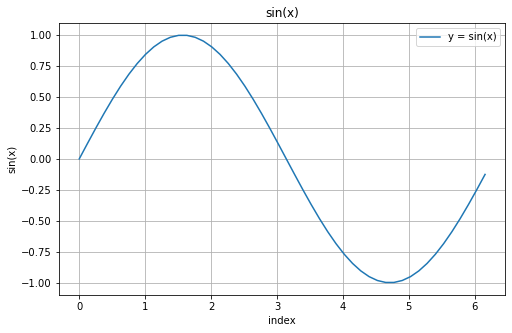

In [2]:
x = np.arange(50) * 2 * np.pi / 50
y = np.sin(x)
fig = plt.figure(figsize=(8, 5)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 1 ,1) # create a subplot of certain size
ax.plot(x, y, label="y = sin(x)")
ax.set_xlabel('index')
ax.set_ylabel("sin(x)")
ax.set_title("sin(x)")
ax.grid()
ax.legend()

### Multiple Lines
---

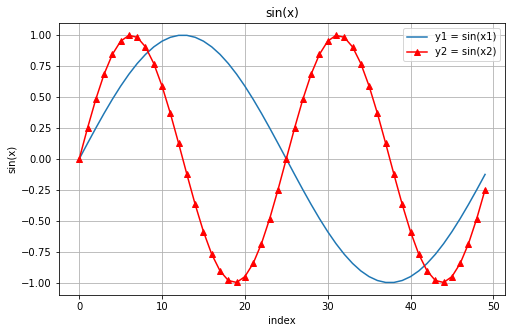

In [34]:
x2 = np.arange(50) * 2 * np.pi / 25
y2 = np.sin(x2)
fig = plt.figure(figsize=(8, 5)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 1 ,1) # create a subplot of certain size
ax.plot(y, label="y1 = sin(x1)")
ax.plot(y2, 'r-^', label="y2 = sin(x2)")
ax.set_xlabel('index')
ax.set_ylabel("sin(x)")
ax.set_title("sin(x)")
ax.grid()
ax.legend()

### Scatter Plots
---

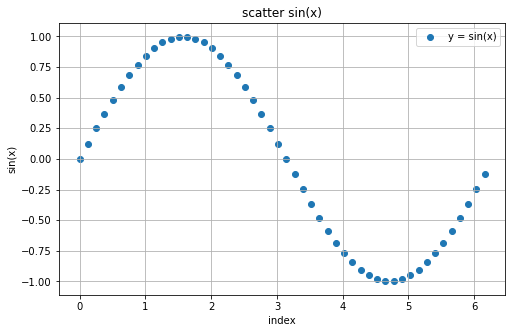

In [35]:
x = np.arange(50) * 2 * np.pi / 50
y = np.sin(x)
fig = plt.figure(figsize=(8, 5)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 1 ,1) # create a subplot of certain size
ax.scatter(x, y, label="y = sin(x)")
ax.set_xlabel('index')
ax.set_ylabel("sin(x)")
ax.set_title("scatter sin(x)")
ax.grid()
ax.legend()

### Bar Plots
---

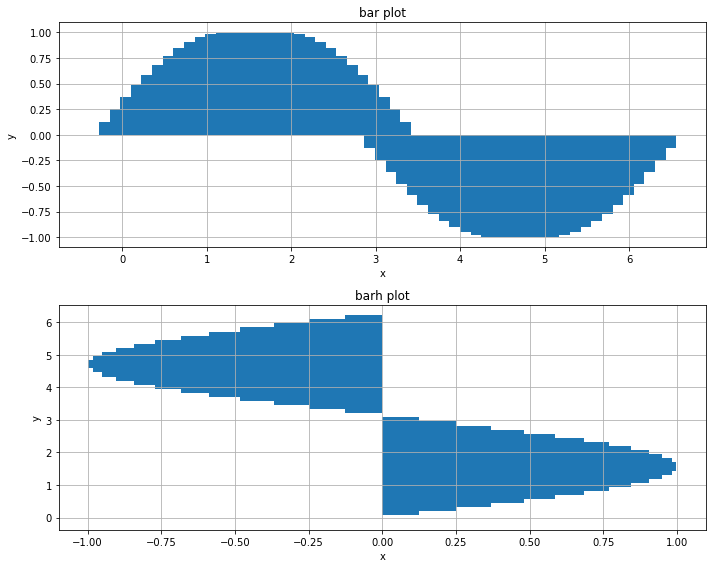

In [36]:
fig = plt.figure(figsize=(10, 8)) # create a figure, just like in matlab
ax1 = fig.add_subplot(2, 1 ,1) # create a subplot of certain size
ax1.bar(x, y)
ax1.set_xlabel('x')
ax1.set_ylabel("y")
ax1.set_title("bar plot")
ax1.grid()

ax2 = fig.add_subplot(2, 1 ,2) # create a subplot of certain size
ax2.barh(x, y, height=x[1]-x[0])
ax2.set_xlabel('x')
ax2.set_ylabel("y")
ax2.set_title("barh plot")
ax2.grid()

plt.tight_layout()

### Histogram
---

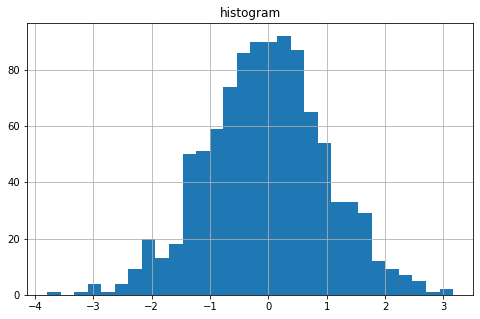

In [39]:
fig = plt.figure(figsize=(8, 5)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 1 ,1) # create a subplot of certain size
ax.hist(np.random.randn(1000), 30) # 30 is the number of bins
ax.set_title("histogram")
ax.grid()

## <img src="./assets/opencv-logo-1.png" style="height:50px;display:inline"> OpenCV
---
OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products.

It has C++, Python, Java and MATLAB interfaces and supports Windows, Linux, Android and Mac OS. OpenCV leans mostly towards real-time vision applications and takes advantage of MMX and SSE instructions when available. A full-featured CUDA and OpenCL interfaces are being actively developed right now. 

## Reading, Writing, and Showing Images
---
### Reading
---
You can use the `imread` function to read in an image from a filepath.

In [37]:
batman_image = cv2.imread(os.path.join(".", "assets","batman_logo.jpg"))
# same as './assets/batman_logo.jpg'

Images in OpenCV are represented as numpy arrays!

In [38]:
type(batman_image), batman_image.shape, batman_image.dtype

(numpy.ndarray, (576, 1024, 3), dtype('uint8'))

### Channels, Image Formats, and using images as arrays
The shape of a color image is (height, width, colors **BGR**) \
While it may seem strange that the height is first, it's because OpenCV treats images as "Rows" and "Columns" of an image. The "height" of an image is the number of rows!

In [39]:
batman_image.shape

(576, 1024, 3)

You can see each pixel is represented by 3 values (uint8 means they are between 0 and 255)

In [40]:
batman_image[0,0] # Get the pixel located at (0,0) from the top left

array([6, 6, 6], dtype=uint8)

Color images consist of "channels" - each color we can render is some combination of red, green, and blue (OR, in the case of a grayscale image, gray).


By default, color images are opened by OpenCV as **BGR**, meaning the values for a given pixel are ordered **"blue, green, red"**.

We can use the `cv2.cvtColor` function to change which color system our image is in. This will appear shortly.

In [41]:
batman_image_rgb = cv2.cvtColor(batman_image, cv2.COLOR_BGR2RGB)

### Showing the image 
---
If you're running scripted Python (not Jupyter notebook) The `cv2.imshow` command will display an image. However, this doesn't work in jupyter notebook, so we'll use Matplotlib's `plt.imshow` instead.

Matplotlib assumes images are in the **RGB** format. OpenCV assumes that images are in the **BGR** format. So, we'll convert colors before showing the image. Let's make a function to do this.

* Note: `matplotlib` also has an `imread` function - `plt.imread(path)`, but for consistency we will use the one in `cv2`.

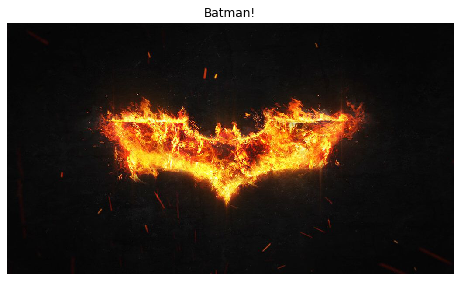

In [42]:
fig = plt.figure(figsize=(8, 5)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 1 ,1) # create a subplot of certain size
ax.imshow(batman_image_rgb)
ax.set_title("Batman!")
ax.set_axis_off()

### Manipulating images
---
#### Changing color spaces
---
OpenCV exposes several functions to work with images. Let's use the `cvtColor` function to convert the color image to gray. Grayscale images do not have a third dimension, instead, each pixel has a luminosity ("whiteness") value between 0 and 255.

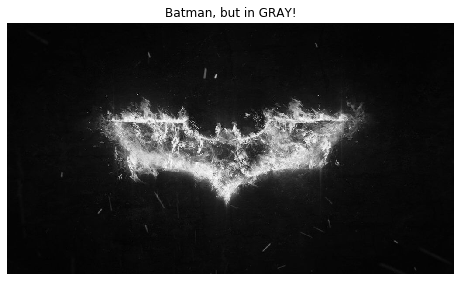

In [43]:
batman_gray = cv2.cvtColor(batman_image, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(8, 5)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 1 ,1) # create a subplot of certain size
ax.imshow(batman_gray, cmap="gray")
ax.set_title("Batman, but in GRAY!")
ax.set_axis_off()

We also can manipulate it by doing anything we would to a normal array. Let's make an image that includes the gray Batman as the blue channel and red channels, and nothing in the green channels (this is NOT the same as excluding the green channel from the original image).

created image of shape (576, 1024, 3)


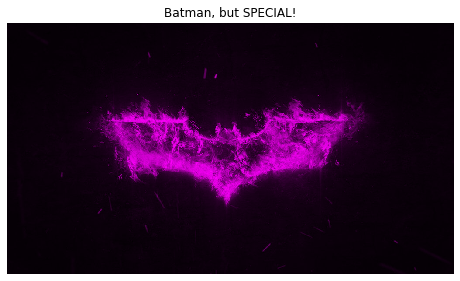

In [44]:
empty_arr = np.zeros(batman_gray.shape, dtype=np.uint8)

# stack them, making the 3rd axis
special_batman = np.stack([ batman_gray, empty_arr, batman_gray, ], axis=2)
print("created image of shape", special_batman.shape)

fig = plt.figure(figsize=(8, 5)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 1, 1) # create a subplot of certain size
ax.imshow(special_batman)
ax.set_title("Batman, but SPECIAL!")
ax.set_axis_off()

#### Resizing images
---
We can also resize images using `resize`. This needs the output size. Note that these are image sizes, which are expressed as (width, height), NOT to be confused with their shape.

resized to image of shape (1152, 3072, 3)


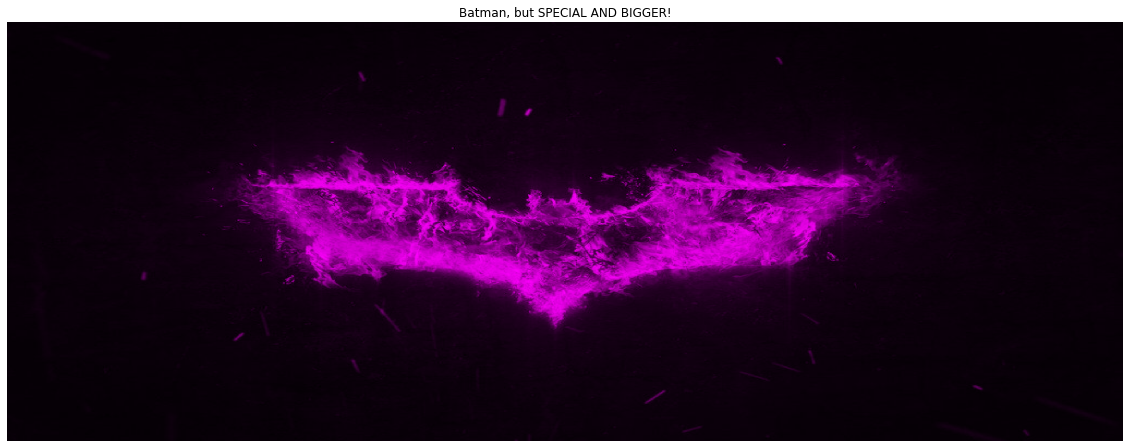

In [45]:
image_height, image_width, image_num_channels = special_batman.shape
new_height = image_height * 2
new_width = image_width * 3

# Resize it to 3x the width, and 2x the height, so we expect some distortion. 
# (To display it in the browser, the image is being scaled down anyway, so resizing it 2 x 2 will not be obvious)

bigger_special_batman = cv2.resize(special_batman, (new_width, new_height))
print("resized to image of shape", bigger_special_batman.shape)

fig = plt.figure(figsize=(20, 15)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 1, 1) # create a subplot of certain size
ax.imshow(bigger_special_batman)
ax.set_title("Batman, but SPECIAL AND BIGGER!")
ax.set_axis_off()

### Writing an Image
---
The `imwrite` function can write out an image. Let's write out the image we just made, so we can use it later!

In [55]:
output_path = os.path.join(".", "assets", "output_batman.png")
cv2.imwrite(output_path, bigger_special_batman)

True

We should be able to read that image directly from the file. Let's try!

Read file of shape: (1152, 3072, 3) type uint8


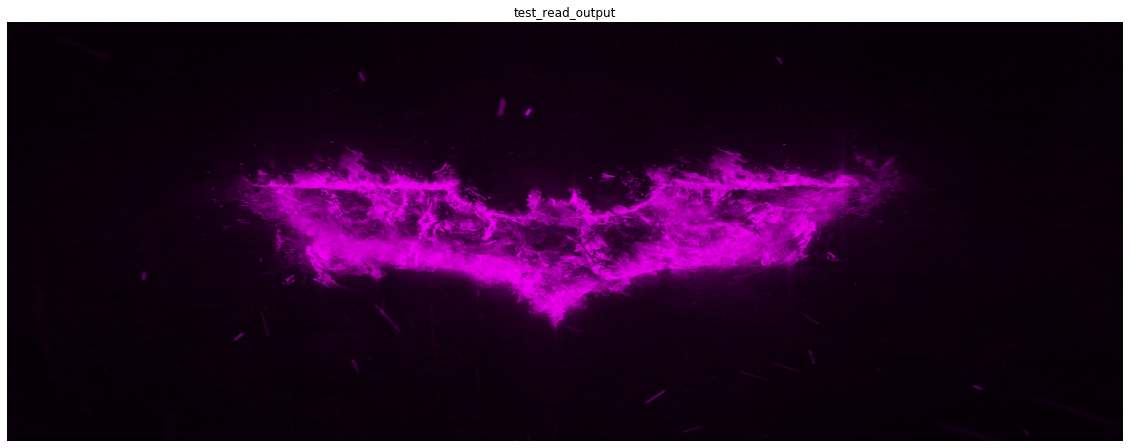

In [56]:
test_read_output = cv2.imread(output_path)
print("Read file of shape:", test_read_output.shape, "type",test_read_output.dtype)
fig = plt.figure(figsize=(20, 15)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 1, 1) # create a subplot of certain size
ax.imshow(test_read_output)
ax.set_title("test_read_output")
ax.set_axis_off()

### <img src="https://img.icons8.com/color/96/000000/video.png" style="height:50px;display:inline"> Working with Video
---
A video is nothing more than a series of images. We can use the `VideoCapture` object to read videos from webcams, IP cameras, and files. Since we're working in the cloud, we'll use files.

We can use the `VideoWriter` object to write videos to a file. (If you were working locally, you could use `cv2.imshow` to display it in real time)

Let's use what we've learned so far to crop the video!

In [57]:
# function to crop a given frame
def crop_frame(frame, crop_size):
    # We're given a frame, either gray or RGB, and a crop-size (w,h)
    crop_w, crop_h = crop_size
    # This is an array! We can slice it
    # Take the first pixels along the height, and along the width 
    cropped = frame[:crop_h, :crop_w]
    return cropped

capture = cv2.VideoCapture(os.path.join(".", 'assets','sample_video.mp4'))

crop_size = (600, 400) # w,h
output_path = os.path.join(".", 'assets','output_cropped.mp4')
# Use the MJPG format
output_format = cv2.VideoWriter_fourcc('M','P','4','V')
output_fps = 30
cropped_output = cv2.VideoWriter(output_path, output_format, output_fps, crop_size)
n = 0
while True:
    successful, next_frame = capture.read()
    if not successful:
        # No more frames to read
        print("Processed %d frames" % n)
        break
    # We have an input frame. Use our function to crop it.
    output_frame = crop_frame(next_frame, crop_size)
    # Write the output frame to the output video
    cropped_output.write(output_frame)
    n += 1
    # Now we have an image! We can process that as we would.

# We have to give up the file at the end.
capture.release()
cropped_output.release()

Processed 500 frames


## <img src="https://img.icons8.com/officel/80/000000/rgb-circle-3.png" style="height:50px;display:inline"> Image Processing 101 - Basic Concepts
---

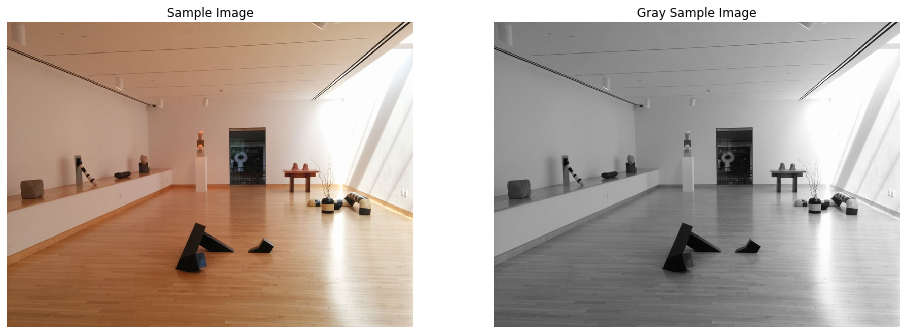

In [46]:
# load sample image
img = cv2.imread('./assets/sample_images/noguchi02.jpg')
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(16, 10)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 2, 1) # create a subplot of certain size
ax.imshow(img)
ax.set_title("Sample Image")
ax.set_axis_off()

ax = fig.add_subplot(1, 2, 2)
ax.imshow(gray_img, cmap="gray")
ax.set_title("Gray Sample Image")
ax.set_axis_off()

### Binary thresholding
---
Examples using thresholding on brightness/darkness of grayscale image and on color ranges.

#### Binary thresholding on grayscale image
---

In [48]:
help(cv2.threshold)

Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst]) -> retval, dst
    .   @brief Applies a fixed-level threshold to each array element.
    .   
    .   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
    .   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
    .   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
    .   values. There are several types of thresholding supported by the function. They are determined by
    .   type parameter.
    .   
    .   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
    .   above values. In these cases, the function determines the optimal threshold value using the Otsu's
    .   or Triangle algorithm and uses it instead of the specified thresh.
    .   
    .   @note Currently, the Otsu's and Triangle methods a

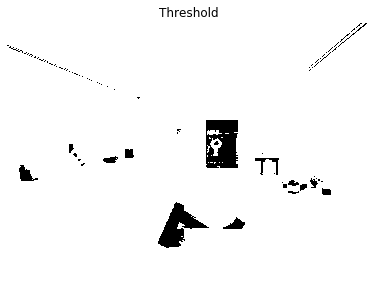

In [47]:
# threshold for grayscale image
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
fig = plt.figure(figsize=(8, 5)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 1 ,1) # create a subplot of certain size
ax.imshow(threshold_img, cmap="gray")
ax.set_title("Threshold")
ax.set_axis_off()

#### Binary thresholding on color
---

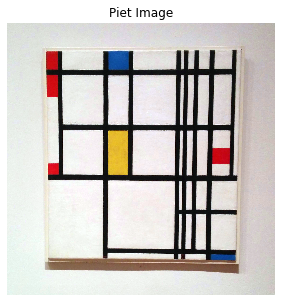

In [49]:
piet = cv2.imread('./assets/sample_images/piet.png')
piet_hsv = cv2.cvtColor(piet, cv2.COLOR_BGR2HSV)

fig = plt.figure(figsize=(8, 5)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 1 ,1) # create a subplot of certain size
ax.imshow(cv2.cvtColor(piet, cv2.COLOR_BGR2RGB))
ax.set_title("Piet Image")
ax.set_axis_off()

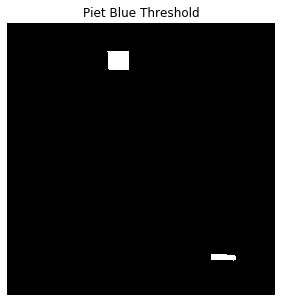

In [50]:
# threshold for hue channel in blue range
blue_min = np.array([85, 60, 60], np.uint8)
blue_max = np.array([150, 255, 255], np.uint8)
threshold_blue_img = cv2.inRange(piet_hsv, blue_min, blue_max)

# show threshold bits
threshold_blue_img = cv2.cvtColor(threshold_blue_img, cv2.COLOR_GRAY2RGB)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1 ,1)
ax.imshow(threshold_blue_img)
ax.set_title("Piet Blue Threshold")
ax.set_axis_off()

### Using binary thresholding to obtain an image mask
---

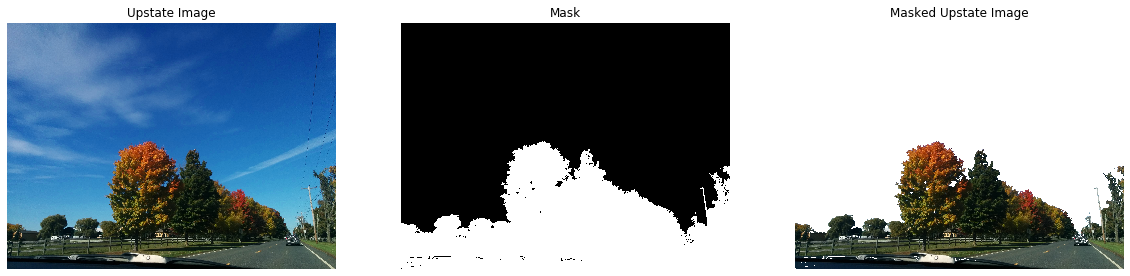

In [51]:
upstate = cv2.imread('./assets/sample_images/upstate-ny.jpg')
upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)

# mask out the sky
mask_inverse = cv2.inRange(upstate_hsv, blue_min, blue_max) # 1 for the sky
mask = cv2.bitwise_not(mask_inverse) # 0 for the sky

# apply the mask
# convert single channel mask back into 3 channels
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)

# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

fig = plt.figure(figsize=(20, 10)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 3 ,1)
ax.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB))
ax.set_title("Upstate Image")
ax.set_axis_off()

ax = fig.add_subplot(1, 3 ,2)
ax.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))
ax.set_title("Mask")
ax.set_axis_off()

ax = fig.add_subplot(1, 3 ,3)
ax.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))
ax.set_title("Masked Upstate Image")
ax.set_axis_off()


## Gaussian Blur
---
Gaussian blurring in action, and how it makes a difference in the binary image that it produces.

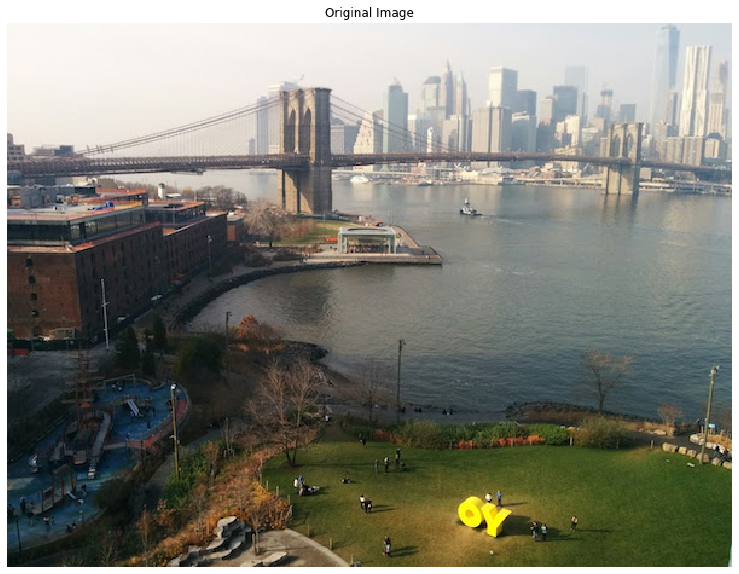

In [52]:
# load a sample image
img = cv2.imread('./assets/sample_images/oy.jpg')
fig = plt.figure(figsize=(16, 10)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 1, 1) # create a subplot of certain size
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.set_title("Original Image")
ax.set_axis_off()

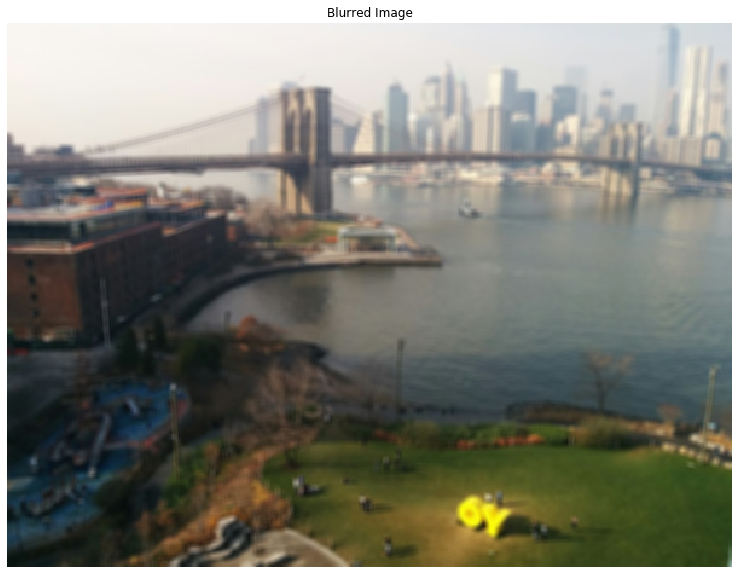

In [53]:
# preproccess with blurring, with 5x5 kernel
img_blur_small = cv2.GaussianBlur(img, (5,5), 25) # last parameter is the variance of the gaussian
fig = plt.figure(figsize=(16, 10)) # create a figure, just like in matlab
ax = fig.add_subplot(1, 1, 1) # create a subplot of certain size
ax.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))
ax.set_title("Blurred Image")
ax.set_axis_off()

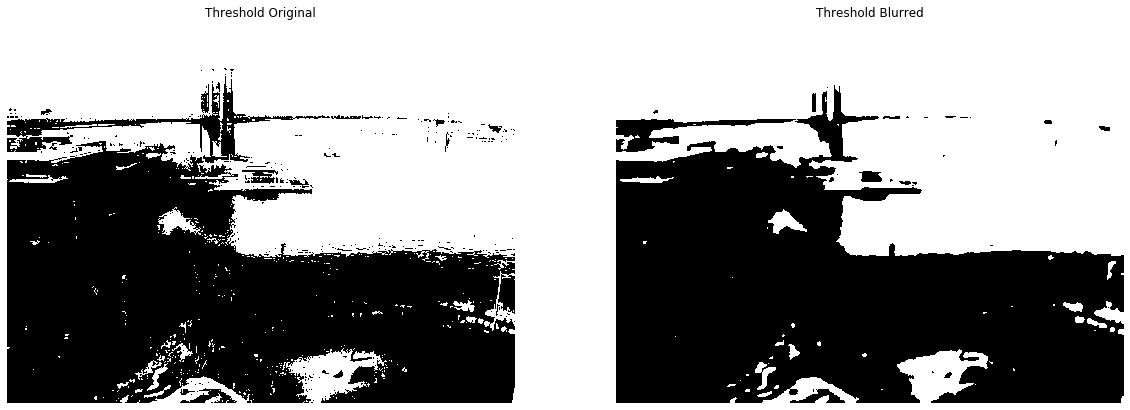

In [54]:
# threshold on regular image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold_img = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)

# threshold on blurred image
gray_blur_img = cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2GRAY)
_, threshold_img_blur = cv2.threshold(gray_blur_img, 100, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2 ,1)
ax.imshow(cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB))
ax.set_title("Threshold Original")
ax.set_axis_off()

ax = fig.add_subplot(1, 2 ,2)
ax.imshow(cv2.cvtColor(threshold_img_blur, cv2.COLOR_GRAY2RGB))
ax.set_title("Threshold Blurred")
ax.set_axis_off()

## Working with Other Libraries - Scikit-Image
---
<img src="./assets/scikit-image-logo.png" style="height:100px">

Scikit-Image is another great image-processing and computer vision library and you definitely work with it if you prefer.
Here are some tutorials: <a href="https://github.com/scikit-image/skimage-tutorials/tree/master/lectures">Click Here</a>.

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* Python Course <a href="https://www.youtube.com/watch?v=rfscVS0vtbw"> Learn Python - Full Course for Beginners </a> (only 4 hours).

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* EE 046746 Spring 21 - <a href="https://taldatech.github.io/">Tal Daniel</a> 
* 6.819/6.869: Advances in Computer Vision, MIT CSAIL, Julie Ganeshan (MIT).
* <a href="http://cs231n.github.io/python-numpy-tutorial/">Python Numpy Tutorial</a> - CS231n Convolutional Neural Networks for Visual Recognition, Justin Johnson.
* <a href="https://github.com/piratefsh/image-processing-101"> Image Processing 101 </a>
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com